In [1]:
import pandas as pd
import numpy as np
import unicodedata
import re
import contractions
import string
import distance
import glob

#vis

import matplotlib.pyplot as plt
import seaborn as sns 

from tqdm import tnrange

from bokeh.plotting import figure, show, output_notebook, output_file, save
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Category10,Category20

from wordcloud import WordCloud, ImageColorGenerator
from scipy.ndimage import gaussian_gradient_magnitude


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import train_test_split

#spacy
import spacy
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
nlp = spacy.load("en_core_web_sm")
nlp2 = spacy.load("en_core_web_md")
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
import textwrap
stops = stopwords.words('english')
new_stopwords = ["to","the","is","in","and","for","a","databricks","this","not","i","with","it","we","of","on","https","are","have","that","but","please","from","can","you","when","if","-","as","o","be","or","has","customer","see","using","an","time","any",".","our","t","help","hi","was","there","team","am","my","url","at","by","id","what","below","which","need","no","could","some","while","use","new","same","us","s","they","me","also","how","details","after","know","all","so","would","thanks","one","like","start","1","do","2","2022","however","00","up","about","hello","only","will","did","arr","your","true","tried","check","before","due","been","note","other","false","out","more","end","cannot","where","into","then","support","want","why","does","since","happened","were","found","last","details.","m","still","here","these","question","answer","time", "subscription", "subscriptions","didn","successfully","successful","went", "test", "tested","tests", "confirm", "confirmed","along","both","non","through","means","being","asked","ask","able","unable","believe","something","actually","back","identified","jan","feb","mar","apr","may","jun","jul","oct","nov","dec","chennai","kolkata","mumbai","delhi","never","worked","answers","stopped","occurring","issue","earlier","list","monday","onwards","already","exists","getting","error","fail","get","job","prod","utc-05","eastern","canada","additional","questions","problem","begin","00.000z","approximate","ongoing","leave","sun","mon","tue","wed","thu","fri","sat","utc-07","within","requesttypeid","subscriptiontype","location","resourcegroups","providers","utc-06","central","just","ultimately","because","problemstarttime","goes","having","said","its","locality","go","azureproductsubscriptionname","azureproductsubscriptionid","tenant","unifiedenterprise","supportplandisplayname","databricksconsent","grantpermission","hdinsightconsent","sharememorydump","following","during","resourceuri","workspaceid","workspaces","workspace","hence","caused","though","instanceid","getinstanceid","utc","seconds","elapsed","reason","recent","name","likely","most","times","must","specify","e.g","via","doesn","agent_additional_properties_do_not_edit","start","wasn","requestid","serverrequestid","yesterday","morning","needed","phone","contact","person","seamlessly","efficiently","yes","no","given","party","description","now","minutes","minute","instance","anything","feels","done","such","today","others","came","very","such","mins","avoid","http","https","fix","day","again","had","checked","check","even","sometimes","facing","asking","cause","necessary","steps","resolve","every","comes","under","keeps","showing","perfectly","personal","between","consent","insight","turned","off","email","hostedcontainer","hostprivateip","containerip","clusterid","resources","instantiatedresources","memorymb","ecus","cgroupshares","instancetype","metadata","containermetadata","happen","consider","org","sure","follow-up","jobname","bricks","own","involved","gets","directly","two","recently","happens","solve","issues","queries","possible","present","exist","path","call","deco", "raise","spark","pyspark","traceback","java.lang.thread.run"]
stops.extend(new_stopwords)


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ankush.singal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ankush.singal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ankush.singal/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ankush.singal/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
def load_data(): 
    df_all = pd.read_csv('databricksconversions.csv')
    # Take a subset
    return df_all.loc[:, ["index_name","index_type","title","url","search_text"]]
df = load_data()

df.head()

,index_name,index_type,title,url,search_text
0,aws_docs,aws_doc,SET (Databricks SQL),https://docs.databricks.com/sql/language-manua...,set
1,aws_docs,aws_doc,Databricks SQL Connector for Python,https://docs.databricks.com/dev-tools/python-s...,python and sql server connection
2,aws_docs,aws_doc,Databricks Connect,https://docs.databricks.com/dev-tools/databric...,python and sql server connection
3,aws_docs,aws_doc,weekday function (Databricks SQL),https://docs.databricks.com/sql/language-manua...,sunday
4,aws_docs,aws_doc,weekday function,https://docs.databricks.com/spark/latest/spark...,sunday


In [3]:
df.index_type.value_counts()

aws_doc               93689
feeditem_1             4392
gcp_docs               2427
aws kb                 2128
ms_azure               1044
case                    429
knowledge__kav          368
ms_kb                   158
message                 157
blog                    109
user                     84
apache_spark             76
gcp_kb                   69
feeditem                 63
issue                    10
collaborationgroup        3
Name: index_type, dtype: int64

In [4]:
cols = ['index_type']
df[cols] = df[cols].astype('category')

In [5]:
#https://datascienceparichay.com/article/pandas-emove-categories-from-a-categorical-column/#:~:text=You%20can%20use%20the%20Pandas,accessor%20to%20apply%20this%20function.&text=Pass%20the%20category%20or%20a,an%20argument%20to%20the%20function.
df["index_type"] = df["index_type"].cat.remove_categories(["feeditem_1","feeditem"])

In [6]:
# Remove URLs with fragments and parameters
df['url'] = df['url'].str.split('#').str[0]
df['url'] = df['url'].str.split('?').str[0]

In [7]:
df = df[df["title"].str.contains("Genie|genie|Gnie") == False]
df.reset_index(inplace = True)
del df['index']
df.head()

,index_name,index_type,title,url,search_text
0,aws_docs,aws_doc,SET (Databricks SQL),https://docs.databricks.com/sql/language-manua...,set
1,aws_docs,aws_doc,Databricks SQL Connector for Python,https://docs.databricks.com/dev-tools/python-s...,python and sql server connection
2,aws_docs,aws_doc,Databricks Connect,https://docs.databricks.com/dev-tools/databric...,python and sql server connection
3,aws_docs,aws_doc,weekday function (Databricks SQL),https://docs.databricks.com/sql/language-manua...,sunday
4,aws_docs,aws_doc,weekday function,https://docs.databricks.com/spark/latest/spark...,sunday


# PRUNNING BY SETTING THRESHOLD

In [8]:
# def remove_shorter_query(data):
#     data["search_text"] = data["search_text"].apply(lambda x:str(x).split(' '))
#     data = data[data["search_text"].apply(lambda x:True if len(x) > 1 else False)]
#     data["search_text"] = data["search_text"].apply(lambda x:' '.join(x))
#     data = data.reset_index()
#     del data["index"]
    
#     return data

In [9]:
def remove_shorter_query(data,column,n):
    data[column] = data[column].apply(lambda x:str(x).split(' '))
    data = data[data[column].apply(lambda x:True if len(x) > n else False)]
    data[column] = data[column].apply(lambda x:' '.join(x))
    data = data.reset_index()
    del data["index"]
    
    return data

In [10]:
df = remove_shorter_query(df,"search_text",1)

/var/folders/7q/zq0k80m94v5408fgfvkddv880000gp/T/ipykernel_65598/127429367.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].apply(lambda x:' '.join(x))


In [11]:
df.head()

,index_name,index_type,title,url,search_text
0,aws_docs,aws_doc,Databricks SQL Connector for Python,https://docs.databricks.com/dev-tools/python-s...,python and sql server connection
1,aws_docs,aws_doc,Databricks Connect,https://docs.databricks.com/dev-tools/databric...,python and sql server connection
2,aws_docs,aws_doc,Configure clusters,https://docs.databricks.com/clusters/configure...,high concurrency
3,aws_docs,aws_doc,Track ML Model training data with Delta Lake,https://docs.databricks.com/applications/mlflo...,dummy data ml
4,aws_docs,aws_doc,Debugging Apache Spark streaming applications,https://docs.databricks.com/spark/latest/rdd-s...,driver log


In [12]:
# Group by page
grouped_df = df.groupby(['url']).agg({'search_text':list})
 
# Join all queries in a single string
#https://bobbyhadz.com/blog/python-typeerror-sequence-item-0-expected-str-instance-float-found
grouped_df['queries'] = grouped_df['search_text'].apply(lambda x: ' '.join(map(str,x)))
 
# Create a list of grouped queries
# for each page. 
queries = list(grouped_df['queries'])

In [36]:
# queries

In [14]:
tfidf_vec = TfidfVectorizer(min_df=0.005, 
                            stop_words=stops) 
data_tfidf = tfidf_vec.fit_transform(queries).todense()
tfidf_df = pd.DataFrame(
    data_tfidf,
    columns=tfidf_vec.get_feature_names(),
    index=grouped_df.index
    )
 
tfidf_df
# pca = PCA( 0.95, random_state=2140)
# data_pca = pca.fit_transform(data_tfidf)

/Users/ankush.singal/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['000z', '05', '06', '07', 'follow', 'java', 'lang', 'run', 'thread'] not in stop_words.
  warnings.warn(
/Users/ankush.singal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,academy,access,account,accounts,acl,add,adding,adls,admin,...,vpc,vs,week,widget,window,write,writing,xml,year,zone
url,,,,,,,,,,,,,,,,,,,,,
https://community.databricks.com/s/feed/0D53f00001GHVfkCAH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://community.databricks.com/s/feed/0D53f00001GHViCCAX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://community.databricks.com/s/feed/0D53f00001PAh67CAD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://community.databricks.com/s/feed/0D53f00001Poyg7CAB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://community.databricks.com/s/feed/0D53f00001PozGOCAZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://spark.apache.org/docs/latest/streaming-custom-receivers.html,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://spark.apache.org/docs/latest/streaming-kafka-0-10-integration.html,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://spark.apache.org/docs/latest/structured-streaming-kafka-integration.html,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
pca = PCA( 0.95, random_state=2140)
data_pca = pca.fit_transform(data_tfidf)

/Users/ankush.singal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [16]:
print( f"TF-IDF dimension - {data_tfidf.shape[1]}" )
print( f"TF-IDF + PCA dimension - {data_pca.shape[1]}" )

TF-IDF dimension - 375
TF-IDF + PCA dimension - 294


In [17]:
N_WORDS = 30
mean_data_tfidf = np.array( data_tfidf.mean( axis=0 ) ).flatten()
vocabulary = tfidf_vec.get_feature_names()
words_id = np.flip( mean_data_tfidf.argsort()[-N_WORDS:] )

word_val_data = [ (vocabulary[id], mean_data_tfidf[id]) for id in words_id ]
word_val_data = pd.DataFrame(word_val_data, columns=['words','values'])

/Users/ankush.singal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Top-30 most important words')

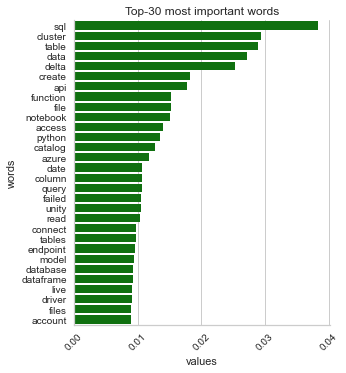

In [18]:
g = sns.catplot(data=word_val_data, color='green',
                 x='values', y='words', kind='bar' )
g.ax.tick_params(axis='x', rotation=45)
g.ax.set_title( f"Top-{N_WORDS} most important words" )

# Clustering with K-means
Selecting number of clusters

In [19]:
cluster_sizes = range(2, 20+1)
kmeans_models = [ KMeans(i, n_init=20, random_state=2140) for i in cluster_sizes ]
cluster_score = []

for kmeans in kmeans_models:
    y = kmeans.fit_predict(data_pca)
    score = silhouette_score(data_pca, y)
    cluster_score.append( ( kmeans.n_clusters, score) )

cluster_score=np.array(cluster_score)

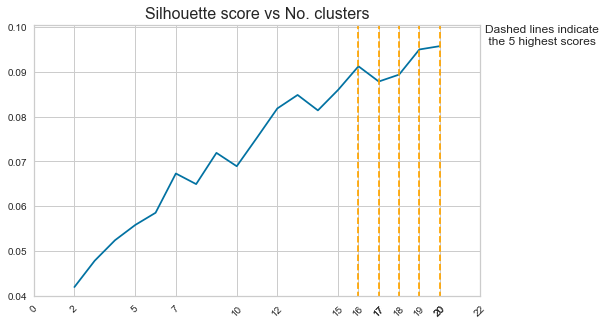

In [20]:
scores = cluster_score[:, 1]
clusters = cluster_score[:, 0]
max_score_clusters = []

fig, ax = plt.subplots( figsize=(8,5) )
ax = sns.lineplot( x=clusters, y=scores, ax=ax )
ax.set_title("Silhouette score vs No. clusters", fontsize=16)

for i in np.argsort( scores )[-5:]:
  ax.vlines(clusters[i], 0, 1, linestyles='--', colors='orange')
  max_score_clusters.append( clusters[i] )

ax.text(1.01, 1, f"Dashed lines indicate\n the {len(max_score_clusters)} highest scores",
        transform=ax.transAxes, ha='left', va='top')

xticks = ax.get_xticks().astype(int)
xticks = np.append(xticks, max_score_clusters)
ax.set_xticks( xticks )
ax.tick_params(axis='x', rotation=45)

ax.set_ylim( [ 0.95*min(scores), 1.05*max(scores) ] )
ax.set_xlim( [ 0, max(clusters)+2 ] )

plt.show()

In [22]:
n_clusters=13
kmeans_model = KMeans(n_clusters, n_init=20, random_state=2140)
y = kmeans_model.fit_predict(data_pca)

# Results visualization
Silhouette samples

In [23]:
sample_scores = silhouette_samples( data_pca, y )
sample_scores_df =  pd.DataFrame( data = {'Cluster':y, 'Silhouette':sample_scores} )
sample_scores_df = sample_scores_df.reset_index()
sample_scores_df=sample_scores_df.sort_values('Silhouette', ascending=False)

In [24]:
sample_scores_df

,index,Cluster,Silhouette
4141,4141,9,0.668629
4264,4264,9,0.668629
4196,4196,9,0.668629
4197,4197,9,0.668629
4198,4198,9,0.668629
...,...,...,...
997,997,4,-0.127356
2313,2313,4,-0.143944
5093,5093,4,-0.174935
4077,4077,4,-0.186718


In [25]:
kmeans_pca_scale = KMeans(n_clusters=11, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(data_pca)

In [26]:
# assign predicted clusters
labels = kmeans_pca_scale.labels_
#print(len(labels)) 
# create a dataframe that contains 
# clusters matched to pages and their queries 
mapping = list(zip(labels, grouped_df.index, queries))
clusters = pd.DataFrame(mapping, columns=['cluster','url','title'])
clusters.head(10)

,cluster,url,title
0,6,https://community.databricks.com/s/feed/0D53f0...,cluster sizing
1,5,https://community.databricks.com/s/feed/0D53f0...,certificate errors
2,5,https://community.databricks.com/s/feed/0D53f0...,update cloudformation template editing cloudfo...
3,10,https://community.databricks.com/s/feed/0D53f0...,free community edition
4,5,https://community.databricks.com/s/feed/0D53f0...,livre pour apprendre databricks office hours u...
5,5,https://community.databricks.com/s/feed/0D53f0...,task api in databricks
6,9,https://community.databricks.com/s/feed/0D53f0...,tar file create table from csv
7,5,https://community.databricks.com/s/feed/0D53f0...,assignment help
8,5,https://community.databricks.com/s/feed/0D53f0...,add rsa file path
9,5,https://community.databricks.com/s/feed/0D53f0...,identity column identity column foreign key


In [27]:
clusters[(clusters.cluster == 6)]

,cluster,url,title
0,6,https://community.databricks.com/s/feed/0D53f0...,cluster sizing
48,6,https://community.databricks.com/s/question/0D...,ec2 instances are not stoped after the cluster...
77,6,https://community.databricks.com/s/question/0D...,cluster dynamically dynamic 365
84,6,https://community.databricks.com/s/question/0D...,best practice job cluster
94,6,https://community.databricks.com/s/question/0D...,cluster sizing
...,...,...,...
5085,6,https://kb.databricks.com/python/python-cmd-fa...,job cluster execution ends up in crash
5154,6,https://kb.gcp.databricks.com/clusters/autoter...,cluster termination
5155,6,https://kb.gcp.databricks.com/clusters/cluster...,failed to launch cluster in kubernetes in 1800...
5156,6,https://kb.gcp.databricks.com/clusters/edited-...,cannot apply updated cluster policy


# Most Important words in each cluster

In [28]:
def most_important_words(data_tfidf, y, topn=10):

    n_clusters = len(np.unique(y))
    result = []
    for i in range(n_clusters):
        ith_cluter_word_sum = np.mean(data_tfidf[np.argwhere(y==i).flatten()], axis=0)

        word_ids = np.array( np.argsort( ith_cluter_word_sum )[0, -topn:] )
        word_ids = word_ids.reshape( -1 )
        result = result + [ (i, id, ith_cluter_word_sum[0, id] ) for id in word_ids ]

    return result

In [29]:
word_cluster_df = pd.DataFrame( most_important_words( data_tfidf, y, topn=5 ), columns=["Cluster", "WordId", "Score"] )
word_cluster_df["Word"] = word_cluster_df["WordId"].apply( lambda id: tfidf_vec.get_feature_names()[id] )
word_cluster_df = word_cluster_df.sort_values( "Score", ascending=False )
word_cluster_df.head()

/Users/ankush.singal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Cluster,WordId,Score,Word
44,8,85,0.679477,date
4,0,260,0.672682,query
29,5,16,0.632697,api
54,10,222,0.619891,notebook
9,1,79,0.589819,data


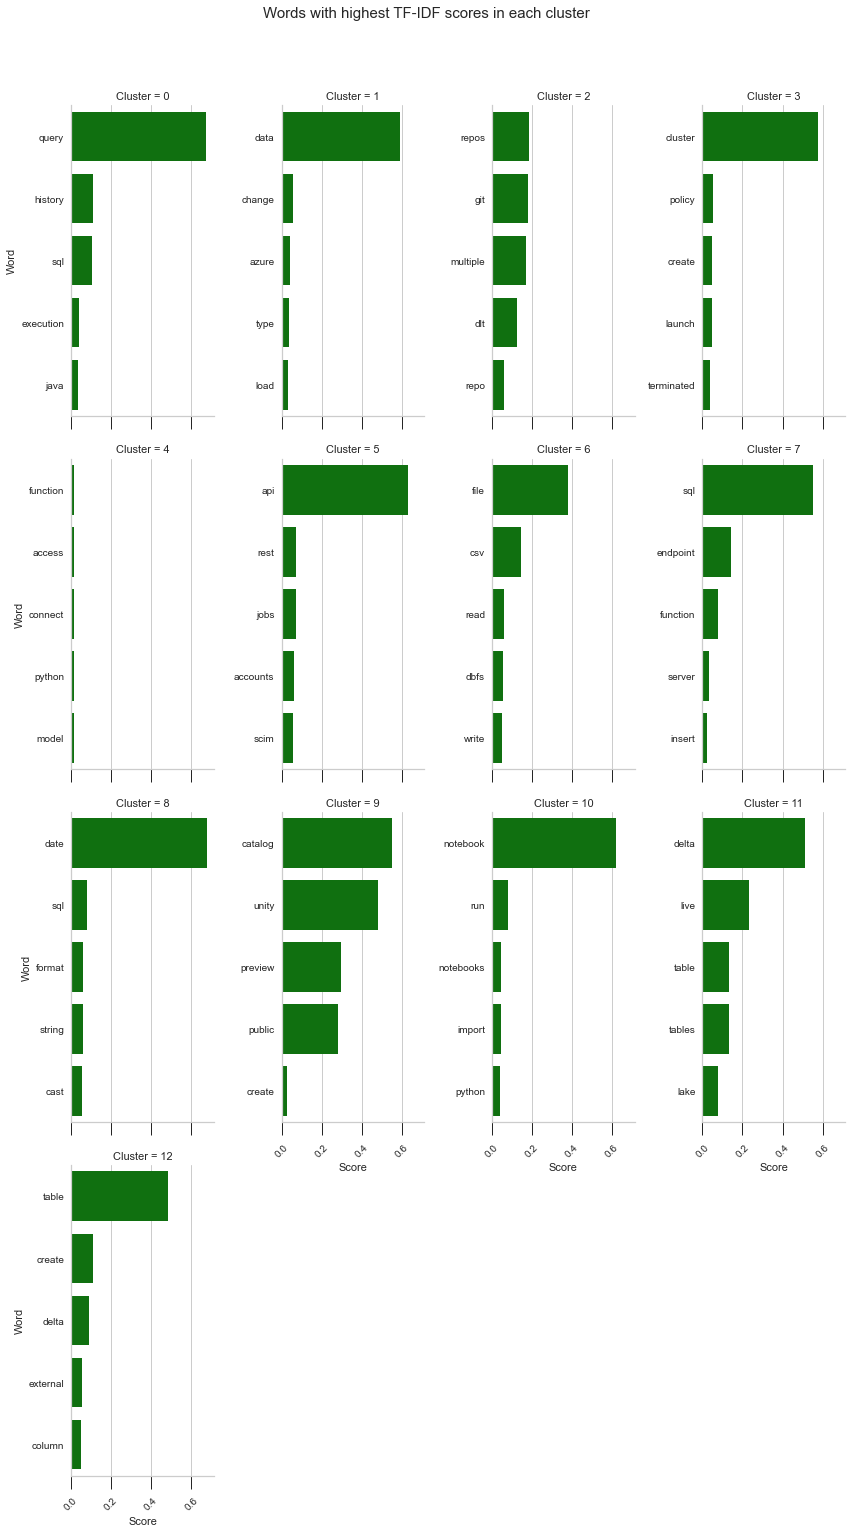

In [30]:
g = sns.catplot(x="Score", y="Word", col="Cluster", data=word_cluster_df, 
                sharey=False, col_wrap=4, kind="bar",
                color = 'green', aspect=.6)
[ ax.tick_params(axis='x', rotation=45, size=13) for ax in g.axes.flatten() ]
g.fig.suptitle( "Words with highest TF-IDF scores in each cluster", y = 1.05, fontsize=15 )
plt.show()

# 2D view of clusters and data with U-Map

In [31]:
!pip install umap-learn

In [32]:
import umap
output_notebook()

Loading BokehJS ...

In [33]:
umap_red = umap.UMAP(n_neighbors=12, metric='correlation', 
                     random_state=214)
data_2d = umap_red.fit_transform( data_pca )

In [34]:
data_2d_df = pd.DataFrame( data={"x":data_2d[:, 0], 
                                 "y":data_2d[:, 1], 
                                 "Cluster":y,
                                 "Silhouette":sample_scores } )


c_pallete = list(Category20[13])
c_pallete[7], c_pallete[0] = c_pallete[0], c_pallete[7]

data_2d_df['colors'] = [ c_pallete[i] for i in data_2d_df['Cluster']]
data_2d_df['search_text'] = df['search_text']
# #Limiting the text's size
data_2d_df['search_text'] = data_2d_df['search_text'].apply( lambda s: s[:100]+'...' if len(s)>100 else s )

data_2d_df, _,_,_ = train_test_split(data_2d_df, data_2d_df, train_size=4500, stratify=data_2d_df['Cluster'])

data_2d_cdf = ColumnDataSource(data_2d_df)


In [35]:
fig = figure(
    title='UMAP 2D projection of the points and clusters',
    plot_width=600,
    plot_height=600,
    tools=('pan, wheel_zoom, reset', 'save')
)

fig.add_tools(HoverTool(tooltips="""
                                      <div>
                                        <span style='font-size: 10px; color: @colors'>@ementa</span>
                                        <span style='font-size: 10px'>cluster - </span>
                                        <span style='font-size: 10px'>@Cluster ;</span>
                                        <span style='font-size: 10px'>index - </span>
                                        <span style='font-size: 10px'>$index ;</span>
                                        <span style='font-size: 10px'>silhouette: </span>
                                        <span style='font-size: 10px'>@Silhouette</span>
                                      </div>
                                 """)
              )

fig.circle('x','y', source=data_2d_cdf, color='colors', 
           legend_group="Cluster",
           line_alpha=0.6, fill_alpha=0.6, size=2)

show(fig)
save(fig, "UMAP2D.html")

/Users/ankush.singal/opt/anaconda3/lib/python3.9/site-packages/bokeh/io/saving.py:142: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/Users/ankush.singal/opt/anaconda3/lib/python3.9/site-packages/bokeh/io/saving.py:154: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'/Users/ankush.singal/Databricks_issues_CS_clustering /UMAP2D.html'